In [1]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [67]:
import numpy as np

In [7]:
ep = pd.read_csv(r'F:\DataSets\time series datasets\Electric_Production.csv',index_col='DATE',parse_dates= True)

In [13]:
ep.head(20)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [9]:
ep.shap

(397, 1)

In [11]:
ep.isnull().sum()

IPG2211A2N    0
dtype: int64

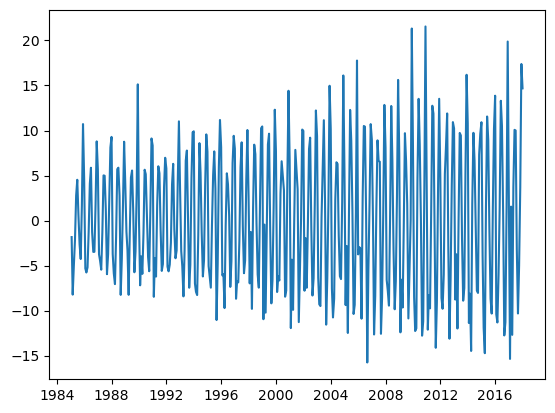

In [14]:
plt.plot(ep.diff())

In [15]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

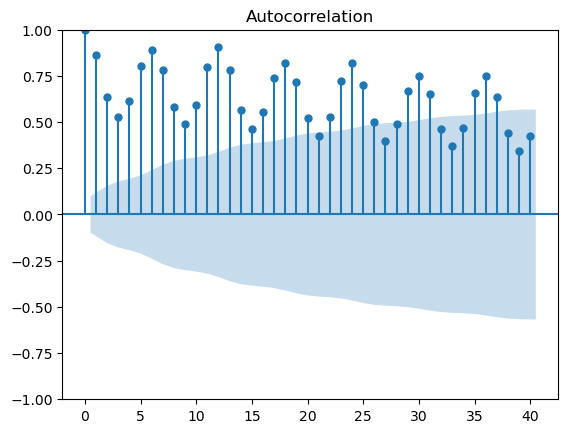

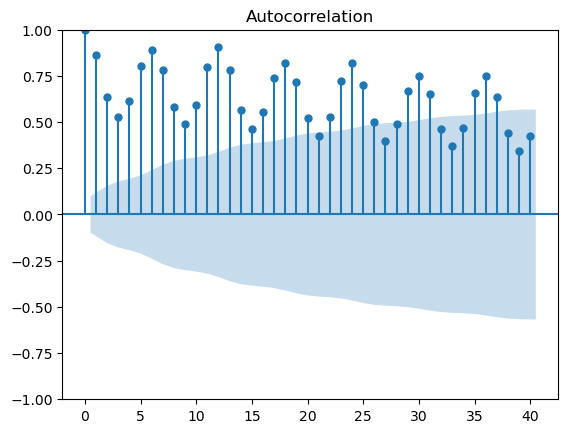

In [16]:
plot_acf(ep,lags=40)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


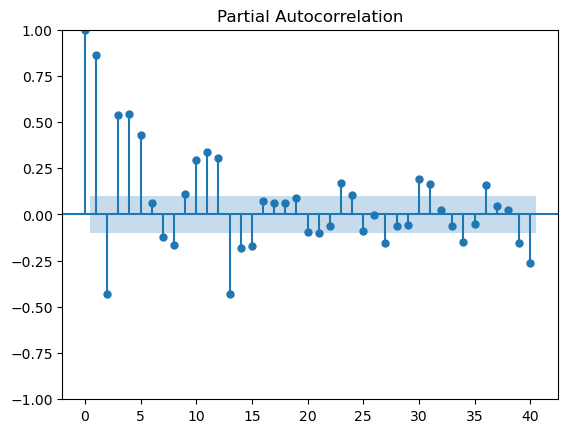

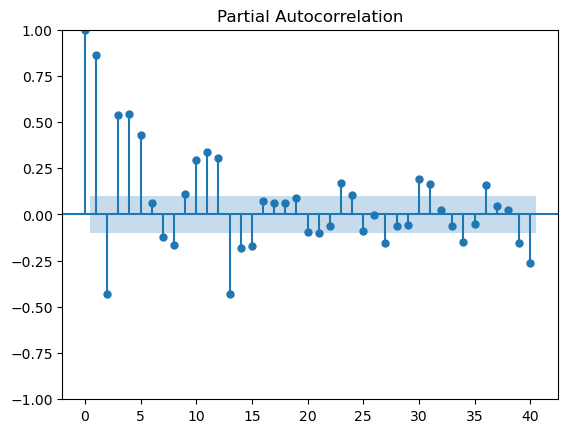

In [17]:
plot_pacf(ep,lags=40)

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
sd = seasonal_decompose(ep)

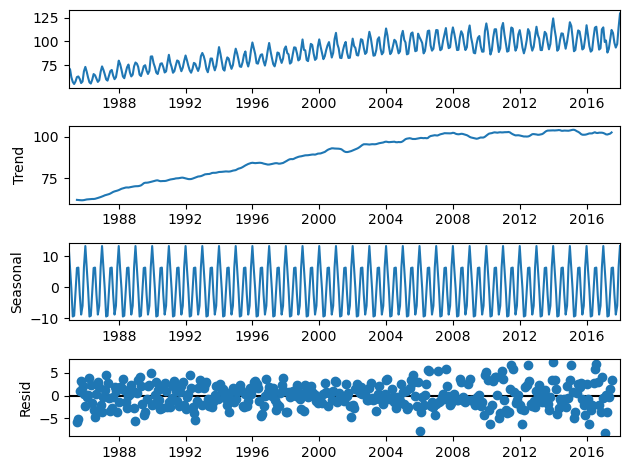

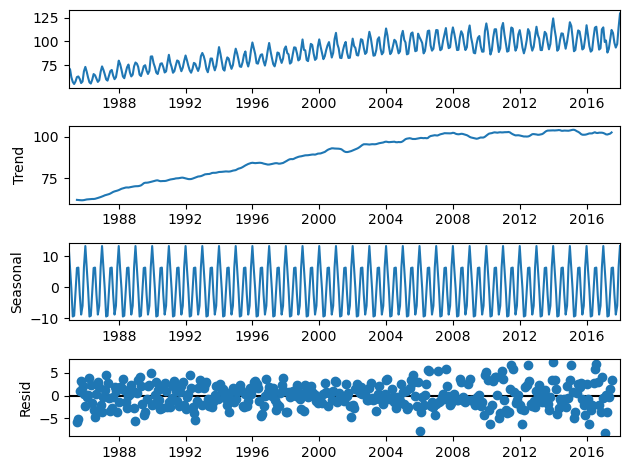

In [20]:
sd.plot()

In [21]:
import pmdarima
from pmdarima import auto_arima

In [22]:
auto_arima(ep , seasonal = True , m=12)

C:\Users\lenovo\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,2)(2,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\lenovo\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
sarimax_model = SARIMAX(ep, order = (1,1,2), seasonal_order = (1,0,1,12))

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
result_ep = sarimax_model.fit()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
pred_ep = result_ep.predict(start = 397 , end = 412)

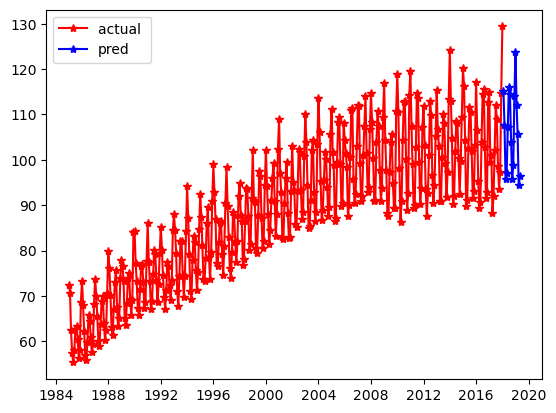

In [35]:
plt.plot(ep , color ='r',marker ='*', label = 'actual ')
plt.plot(pred_ep, color ='b',marker ='*', label = 'pred')
plt.legend()

In [59]:
train = ep.iloc[0:317,] 

In [60]:
test = ep.iloc[317:397]

In [61]:
model_sarima = SARIMAX(train, order = (1,1,2), seasonal_order = (1,0,1,12))

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
model_tr = model_sarima.fit()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [63]:
pred_tr = model_tr.predict(start = 317 , end = 397)

In [64]:
pred_tr

2011-06-01    101.817391
2011-07-01    110.138579
2011-08-01    111.106897
2011-09-01     99.920925
2011-10-01     92.154816
                 ...    
2017-10-01     96.935951
2017-11-01     98.929143
2017-12-01    115.681208
2018-01-01    121.971530
2018-02-01    113.471441
Freq: MS, Name: predicted_mean, Length: 81, dtype: float64

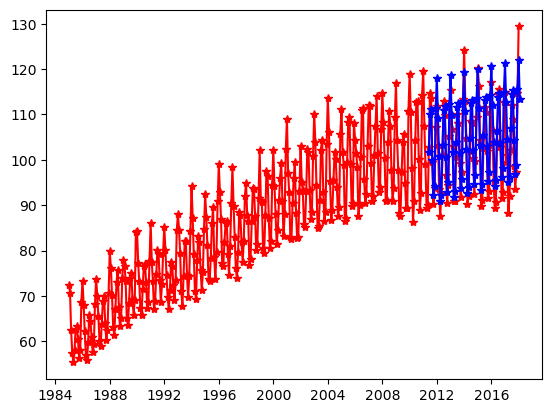

In [65]:
plt.plot(ep , color ='r',marker ='*', label = 'actual ')
plt.plot(pred_tr, color ='b',marker ='*', label = 'pred ')

In [84]:
err_df = pd.DataFrame()
err_df['actual']= round(test)
err_df['predicted']= round(pred_tr)
err_df['error'] = err_df.actual - err_df.predicted
err_df['error_per'] = err_df.error*100/err_df.actual

In [85]:
err_df

,actual,predicted,error,error_per
DATE,,,,
2011-06-01,103.0,102.0,1.0,0.970874
2011-07-01,115.0,110.0,5.0,4.347826
2011-08-01,114.0,111.0,3.0,2.631579
2011-09-01,99.0,100.0,-1.0,-1.010101
2011-10-01,90.0,92.0,-2.0,-2.222222
...,...,...,...,...
2017-09-01,99.0,104.0,-5.0,-5.050505
2017-10-01,94.0,97.0,-3.0,-3.191489
2017-11-01,97.0,99.0,-2.0,-2.061856


In [86]:
mse = np.mean(np.square(err_df.error))
mse

17.7

In [88]:
mape = np.mean(np.abs(err_df.error_per))
mape

3.3918109023661978